# Описание задания

**Цель лабораторной работы:** изучение различных методов визуализация данных.

# Задание

Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь. Для лабораторных работ не рекомендуется выбирать датасеты большого размера.
Создать ноутбук, который содержит следующие разделы:

1) Текстовое описание выбранного Вами набора данных.

2) Основные характеристики датасета.

3) Визуальное исследование датасета.

4) Информация о корреляции признаков.

Сформировать отчет и разместить его в своем репозитории на github.

# Ход выполнения лабораторной работы
## 1. Текстовое описание выбранного набора данных.
Датасет представляет собой набор оценок, полученных студентами высшей школы на тестах в США по различным предметам.

## 2. Основные характеристики датасета.
### Категориальные характеристики

category - Категория проекта

main_category - Основная категория

state - Состояние проекта

country - Страна происхождения проекта

currency - Используемая валюта


### Количественные характеристики

goal - Заданное значение, которое затребовано

pledged - Сколько собрано денег

backers - Количество поддержащих

usd pledged - Количество людей, которые поддержали

usd_pledged_real - Действительное количество поддержавших людей

usd_goal_real - Действительное состояние проекта

### Временные характеристики

deadline - Время окончания

launched - Время запуска

3. Визуальное исследование датасета.

In [0]:
from google.colab import drive, files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Обновим seaborn до необходимой версии:

In [0]:
!pip install -U seaborn

    100% |████████████████████████████████| 215kB 24.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


Датасет представляет из себя проекты kickstarter, которые были опубликованы в январе 2018 года. Он содержит в себе данные о количестве требуемых денег, количестве полученных денег на момент февраля 2018 года.

In [0]:
from google.colab import files
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
os.listdir()
data = pd.read_csv('drive/My Drive/Files/dataset/ks-projects-201801.csv', sep=",")

In [0]:
for col in data.columns:
  temp = data[data[col].isnull()].shape[0]
  print('{} - {}'.format(col, temp))

ID - 0
name - 4
category - 0
main_category - 0
currency - 0
deadline - 0
goal - 0
launched - 0
pledged - 0
state - 0
backers - 0
country - 0
usd pledged - 3797
usd_pledged_real - 0
usd_goal_real - 0


In [0]:
data2 = data.drop(['ID'], axis=1)
data2.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


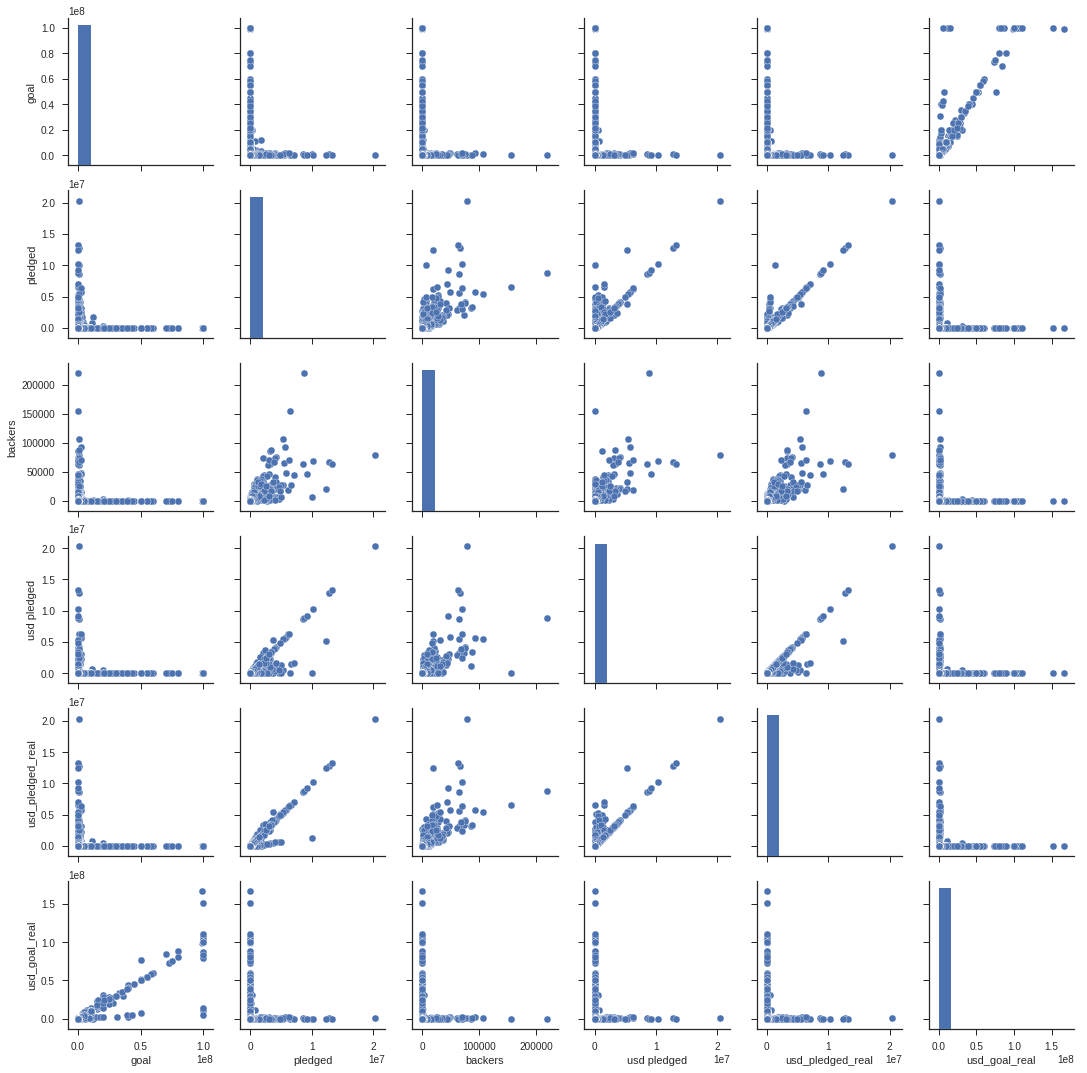

In [0]:
sns.pairplot(data2)

(10, 1000)

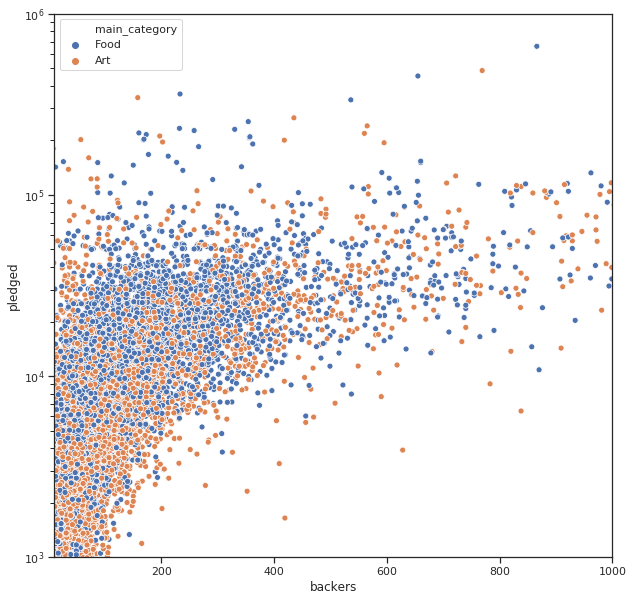

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
data3 = data.loc[data['main_category'].isin(['Food', 'Art'])]
sns.scatterplot(ax=ax, x='backers', y='pledged', data=data3, hue='main_category')
ax.set_yscale('log')
ax.set_ylim(10**3, 10**6)
ax.set_xlim(10, 1000)

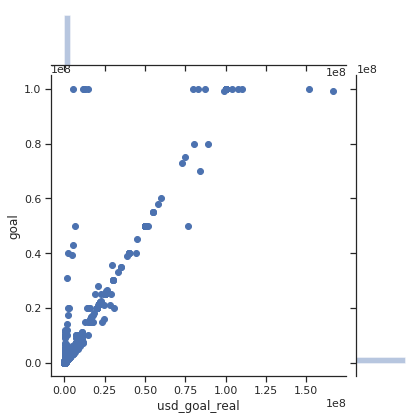

In [0]:
sns.jointplot(x='usd_goal_real', y='goal', data=data)

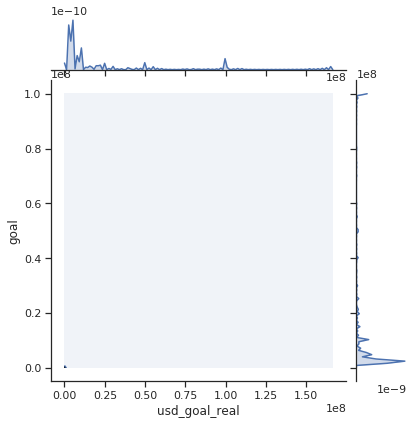

In [0]:
sns.jointplot(x='usd_goal_real', y='goal', data=data, kind="kde")

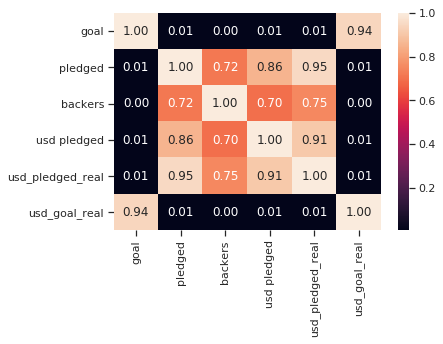

In [0]:
data4 = data.drop(['ID'], axis=1)
sns.heatmap(data4.corr(), annot=True, fmt='.2f')